- manual computation of histogram
- interpretation of quantile/histogram distributions (bias, mean >< median, ...)
- class conditioned pdf/cdf
- class conditioned sampling (with prior for class)
- rulette
    - compute distribution functions
    - guess best simple bet
    - guess best joint bet (number, black/red, odd/even, pass/fail)

### joint/conditional probability distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme() # Setting seaborn style

##### Load the iris dataset (continuous variables)


In [2]:
iris = sns.load_dataset("iris")

#### Let's consider also a  dataset with categorical variables

In [3]:
# draw sample
data = pd.DataFrame(np.ceil(np.random.default_rng(seed = 1234).dirichlet((10, 5, 3), 200)[:, :2] *10).astype('int'), columns = ['X', 'Y'])
# map categorical values
cats = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
data.X = data.X.map({x:cats[i] for i, x in enumerate(np.unique(data.X))})
data.Y = data.Y.map({y:cats[j].lower() for j, y in enumerate(np.unique(data.Y))})
# show
data.head()

,X,Y
0,A,d
1,D,b
2,E,b
3,C,c
4,D,c


### Joint  distributions

The ***joint distribution*** of multiple variables is a probability distribution that describes the likelihood of different combinations of values for those variables occurring simultaneously. In simpler terms, it provides information about the probabilities associated with specific outcomes for all the variables considered together.

Let's consider two random variables, $X$ and $Y$. The joint distribution of $X$ and $Y$, denoted as $P(X, Y)$ or $f(x, y)$, provides the probabilities associated with each possible pair of values $(x, y)$ that $X$ and $Y$ can take on. Mathematically, this joint probability is represented as:

$$P\left(X = x_i, Y = y_j\right)\; \text{or} \; P\left(x_i, y_j\right)$$

Here, $x_i$ and $y_j$ represent specific values that $X$ and $Y$ can assume, respectively.

For two categorical variables the *joint distribution* is the normalized contingency table (analogous to a multivariate histogram of proportions). The *marginal* distributions are the normalized marginal counts (analogous to the histogram of proportions for each individual variable).

The joint distribution satisfies two key properties:

   1. ***Non-negativity***: $P\left(X = x_i, Y = y_j\right) \geq 0, \quad \forall \left(x_i, y_j\right)$
  
   2. ***Normalization***: $\sum_{i,j}P\left(X = x_i, Y = y_j\right) = 1$, meaning that the sum of probabilities for all possible combinations of values equals 1.

The concept can be extended to more than two variables. For three variables $\left(X, Y, Z\right)$, the joint distribution is denoted as $P\left(X, Y, Z\right)$ or $f\left(x, y, z\right)$, and it describes the probabilities of all possible combinations of values for $X$, $Y$, and $Z$ occurring simultaneously.

##### For two categorical variables the joint distribution is given by the normalized contingency table
- this is analogous to a multivariate histogram of proportions

In [12]:
# initialize
CT = np.zeros((cardX, cardY))
# count
for _, obs in data.iterrows(): CT[obs.x, obs.y] += 1
# normalize
xy_jd = CT /np.sum(CT)    
#show
xy_jd, np.sum(xy_jd)

(array([[0.02 , 0.005, 0.02 , 0.03 , 0.   , 0.01 , 0.005],
        [0.005, 0.095, 0.16 , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.055, 0.015, 0.   , 0.005, 0.   , 0.   ],
        [0.095, 0.045, 0.15 , 0.03 , 0.005, 0.   , 0.   ],
        [0.1  , 0.01 , 0.075, 0.06 , 0.   , 0.005, 0.   ]]),
 1.0)

##### For two numerical variables the joint distribution is given by the 2D density function (estimated via multivariate KDE)
- this is analogous to a multivariate histogram of densities and we can visualize it using seaborn

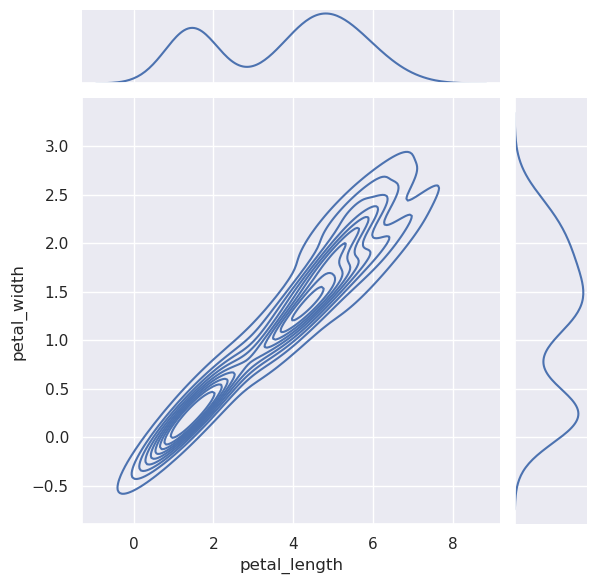

In [13]:
sns.jointplot(data = iris, x = 'petal_length', y = 'petal_width', kind = 'kde');

### Marginal  distributions

The ***joint distribution*** of multiple variables is a probability distribution that describes the likelihood of different combinations of values for those variables occurring simultaneously. In simpler terms, it provides information about the probabilities associated with specific outcomes for all the variables considered together.

The ***marginal distributions*** provide the probabilities of individual variables without considering the others.

Let's consider two random variables, $X$ and $Y$. The joint distribution of $X$ and $Y$, denoted as $P(X, Y)$ or $f(x, y)$, provides the probabilities associated with each possible pair of values $(x, y)$ that $X$ and $Y$ can take on. Mathematically, this joint probability is represented as:

$$P\left(X = x_i, Y = y_j\right)\; \text{or} \; P\left(x_i, y_j\right)$$

Here, $x_i$ and $y_j$ represent specific values that $X$ and $Y$ can assume, respectively.

For two categorical variables the *joint distribution* is the normalized contingency table (analogous to a multivariate histogram of proportions). The *marginal* distributions are the normalized marginal counts (analogous to the histogram of proportions for each individual variable).

The joint distribution satisfies two key properties:

   1. ***Non-negativity***: $P\left(X = x_i, Y = y_j\right) \geq 0, \quad \forall \left(x_i, y_j\right)$
  
   2. ***Normalization***: $\sum_{i,j}P\left(X = x_i, Y = y_j\right) = 1$, meaning that the sum of probabilities for all possible combinations of values equals 1.

The concept can be extended to more than two variables. For three variables $\left(X, Y, Z\right)$, the joint distribution would be denoted as $P\left(X, Y, Z\right)$ or $f\left(x, y, z\right)$, and it would describe the probabilities of all possible combinations of values for $X$, $Y$, and $Z$ occurring simultaneously.

### Conditional distributions

Conditional distributions focus on the probabilities of one variable given specific values of another variable. Covariance measures the degree to which two variables change together.

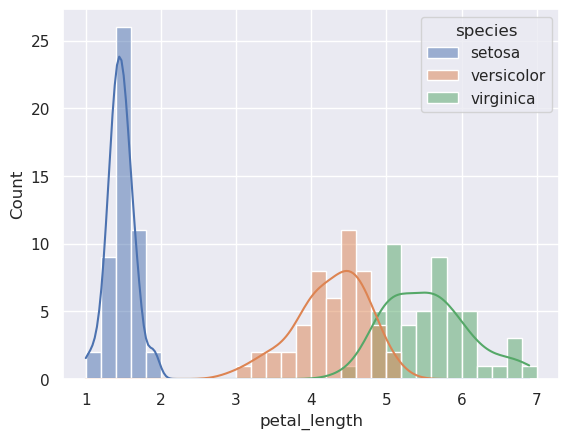

In [14]:
# (hue) conditional distributions
sns.histplot(data = iris, x = "petal_length", hue = 'species', binwidth = 0.2, kde = True);